In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import numpy as np

In [2]:
import scipy.stats
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

In [3]:
from IPython.display import HTML, display
import tabulate

# Hierarchical clustering

#### Import data

In [4]:
df_z = pd.read_parquet('../data/pre_processed/covid_cases_z_trans.parquet')

In [5]:
hac_z = AgglomerativeClustering(n_clusters=4)
hac_z= hac_z.fit(df_z.T)

In [6]:
#The labels for the HAC-clustering 
labels_hac_z = hac_z.labels_
labels_hac_z

array([1, 1, 0, 0, 2, 2, 3, 1, 1, 3, 2, 1, 1, 0, 0, 0, 3, 1, 1, 3, 1, 3,
       3, 2, 0, 0, 3, 1, 1, 2, 1, 3, 1, 0, 1, 1, 2, 3, 1, 3, 0, 1, 1, 1,
       0, 1, 3, 2, 3, 2, 2, 1, 1, 2, 1, 2, 0, 2, 1, 2, 2, 2, 0, 0, 1, 0,
       2, 2, 3, 3, 2, 0, 3, 1, 2, 3, 2, 0, 0, 1, 1])

In [7]:
print("HAC:")
print("Countries in cluster 0:", np.count_nonzero(labels_hac_z == 0))
print("Countries in cluster 1:", np.count_nonzero(labels_hac_z == 1))
print("Countries in cluster 2:", np.count_nonzero(labels_hac_z == 2))
print("Countries in cluster 3:", np.count_nonzero(labels_hac_z == 3))

HAC:
Countries in cluster 0: 17
Countries in cluster 1: 28
Countries in cluster 2: 20
Countries in cluster 3: 16


In [8]:
#Make a new data frame for each cluster
df_hac_z_0 = df_z.T.loc[labels_hac_z == 0].transpose()
df_hac_z_1 = df_z.T.loc[labels_hac_z == 1].transpose()
df_hac_z_2 = df_z.T.loc[labels_hac_z == 2].transpose()
df_hac_z_3 = df_z.T.loc[labels_hac_z == 3].transpose()

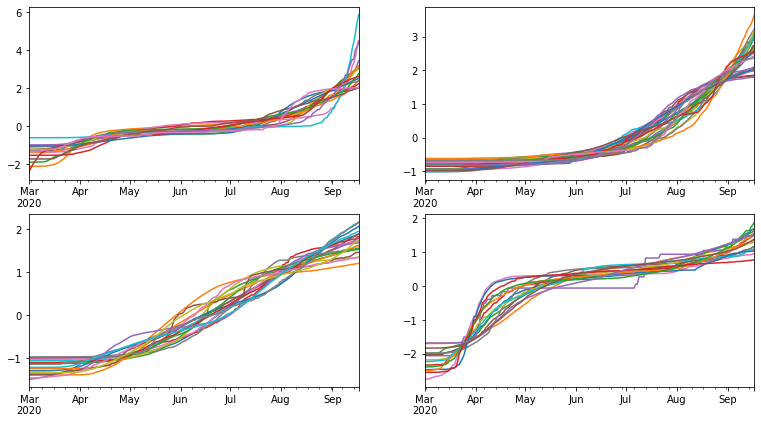

In [9]:
#Make a figure with the four clusters
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(13, 7)
df_hac_z_0.plot(legend='', ax=axes[0,0])
df_hac_z_1.plot(legend='', ax=axes[0,1])
df_hac_z_2.plot(legend='', ax=axes[1,0])
df_hac_z_3.plot(legend='', ax=axes[1,1])

### Cluster score

In [10]:
table = [["Method", "Score"],
        ["Silhouette score",round(silhouette_score(df_z.T, labels=labels_hac_z, metric='euclidean'),4)],
        ["Davies Bouldin score",round(davies_bouldin_score(df_z.T, labels=labels_hac_z),4)],
        ["Calinski Harabasz score",round(calinski_harabasz_score(df_z.T, labels=labels_hac_z),4)]]

display(HTML(tabulate.tabulate(table, tablefmt='html')))

Method,Score
Silhouette score,0.3265
Davies Bouldin score,1.1333
Calinski Harabasz score,58.7344


#### Exporting clustering results

In [11]:
#df_hac_z_0.to_parquet('../results/clustering_results/df_hac_z_0.parquet')
#df_hac_z_1.to_parquet('../results/clustering_results/df_hac_z_1.parquet')
#df_hac_z_2.to_parquet('../results/clustering_results/df_hac_z_2.parquet')
#df_hac_z_3.to_parquet('../results/clustering_results/df_hac_z_3.parquet')